Load required modules

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load MNIST data set

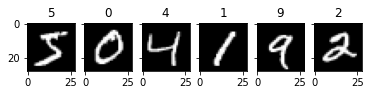

In [2]:
(X_train, G_train),(X_validation, G_validation) = mnist.load_data()

fig, axs = plt.subplots(1, 6,sharex=True, sharey=True)
for i in range(6):
    axs[i].imshow(X_train[i,:], cmap="gray")
    axs[i].set_title(G_train[i])

Scale inputs to be in range $[0,1]$

In [3]:
X_train = X_train/255.0
X_validation = X_validation/255.0

Build rather simple MLP for image classification

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

input_layer1 = layers.Input(shape=(28,28))
flatten_layer1 = layers.Flatten()(input_layer1)
dense_layer1 = layers.Dense(300, activation="relu")(flatten_layer1)
dense_layer2 = layers.Dense(100, activation="relu")(dense_layer1)
output_layer1 = layers.Dense(10, activation="softmax")(dense_layer2)

model = Model(inputs=input_layer1, outputs=output_layer1)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Configure and train model

In [5]:
model.compile(loss="sparse_categorical_crossentropy", # just cross entropy without one-hot encoding
              optimizer="sgd", metrics=["accuracy"])
history_mlp = model.fit(X_train, G_train, epochs=20,
                    validation_data=(X_validation, G_validation))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0037 - accuracy: 0.7319 - val_loss: 0.3116 - val_accuracy: 0.9112
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.9140 - val_loss: 0.2499 - val_accuracy: 0.9280
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2443 - accuracy: 0.9315 - val_loss: 0.2063 - val_accuracy: 0.9390
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2030 - accuracy: 0.9408 - val_loss: 0.1830 - val_accuracy: 0.9465
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1803 - accuracy: 0.9484 - val_loss: 0.1641 - val_accuracy: 0.9514
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1571 - accuracy: 0.9537 - val_loss: 0.1441 - val_accuracy: 0.9579
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1364 - accuracy: 0.9608 - val_loss: 0.1342 - val_accuracy:

Plot training history with respect to training / generalization error (cross entropy loss)

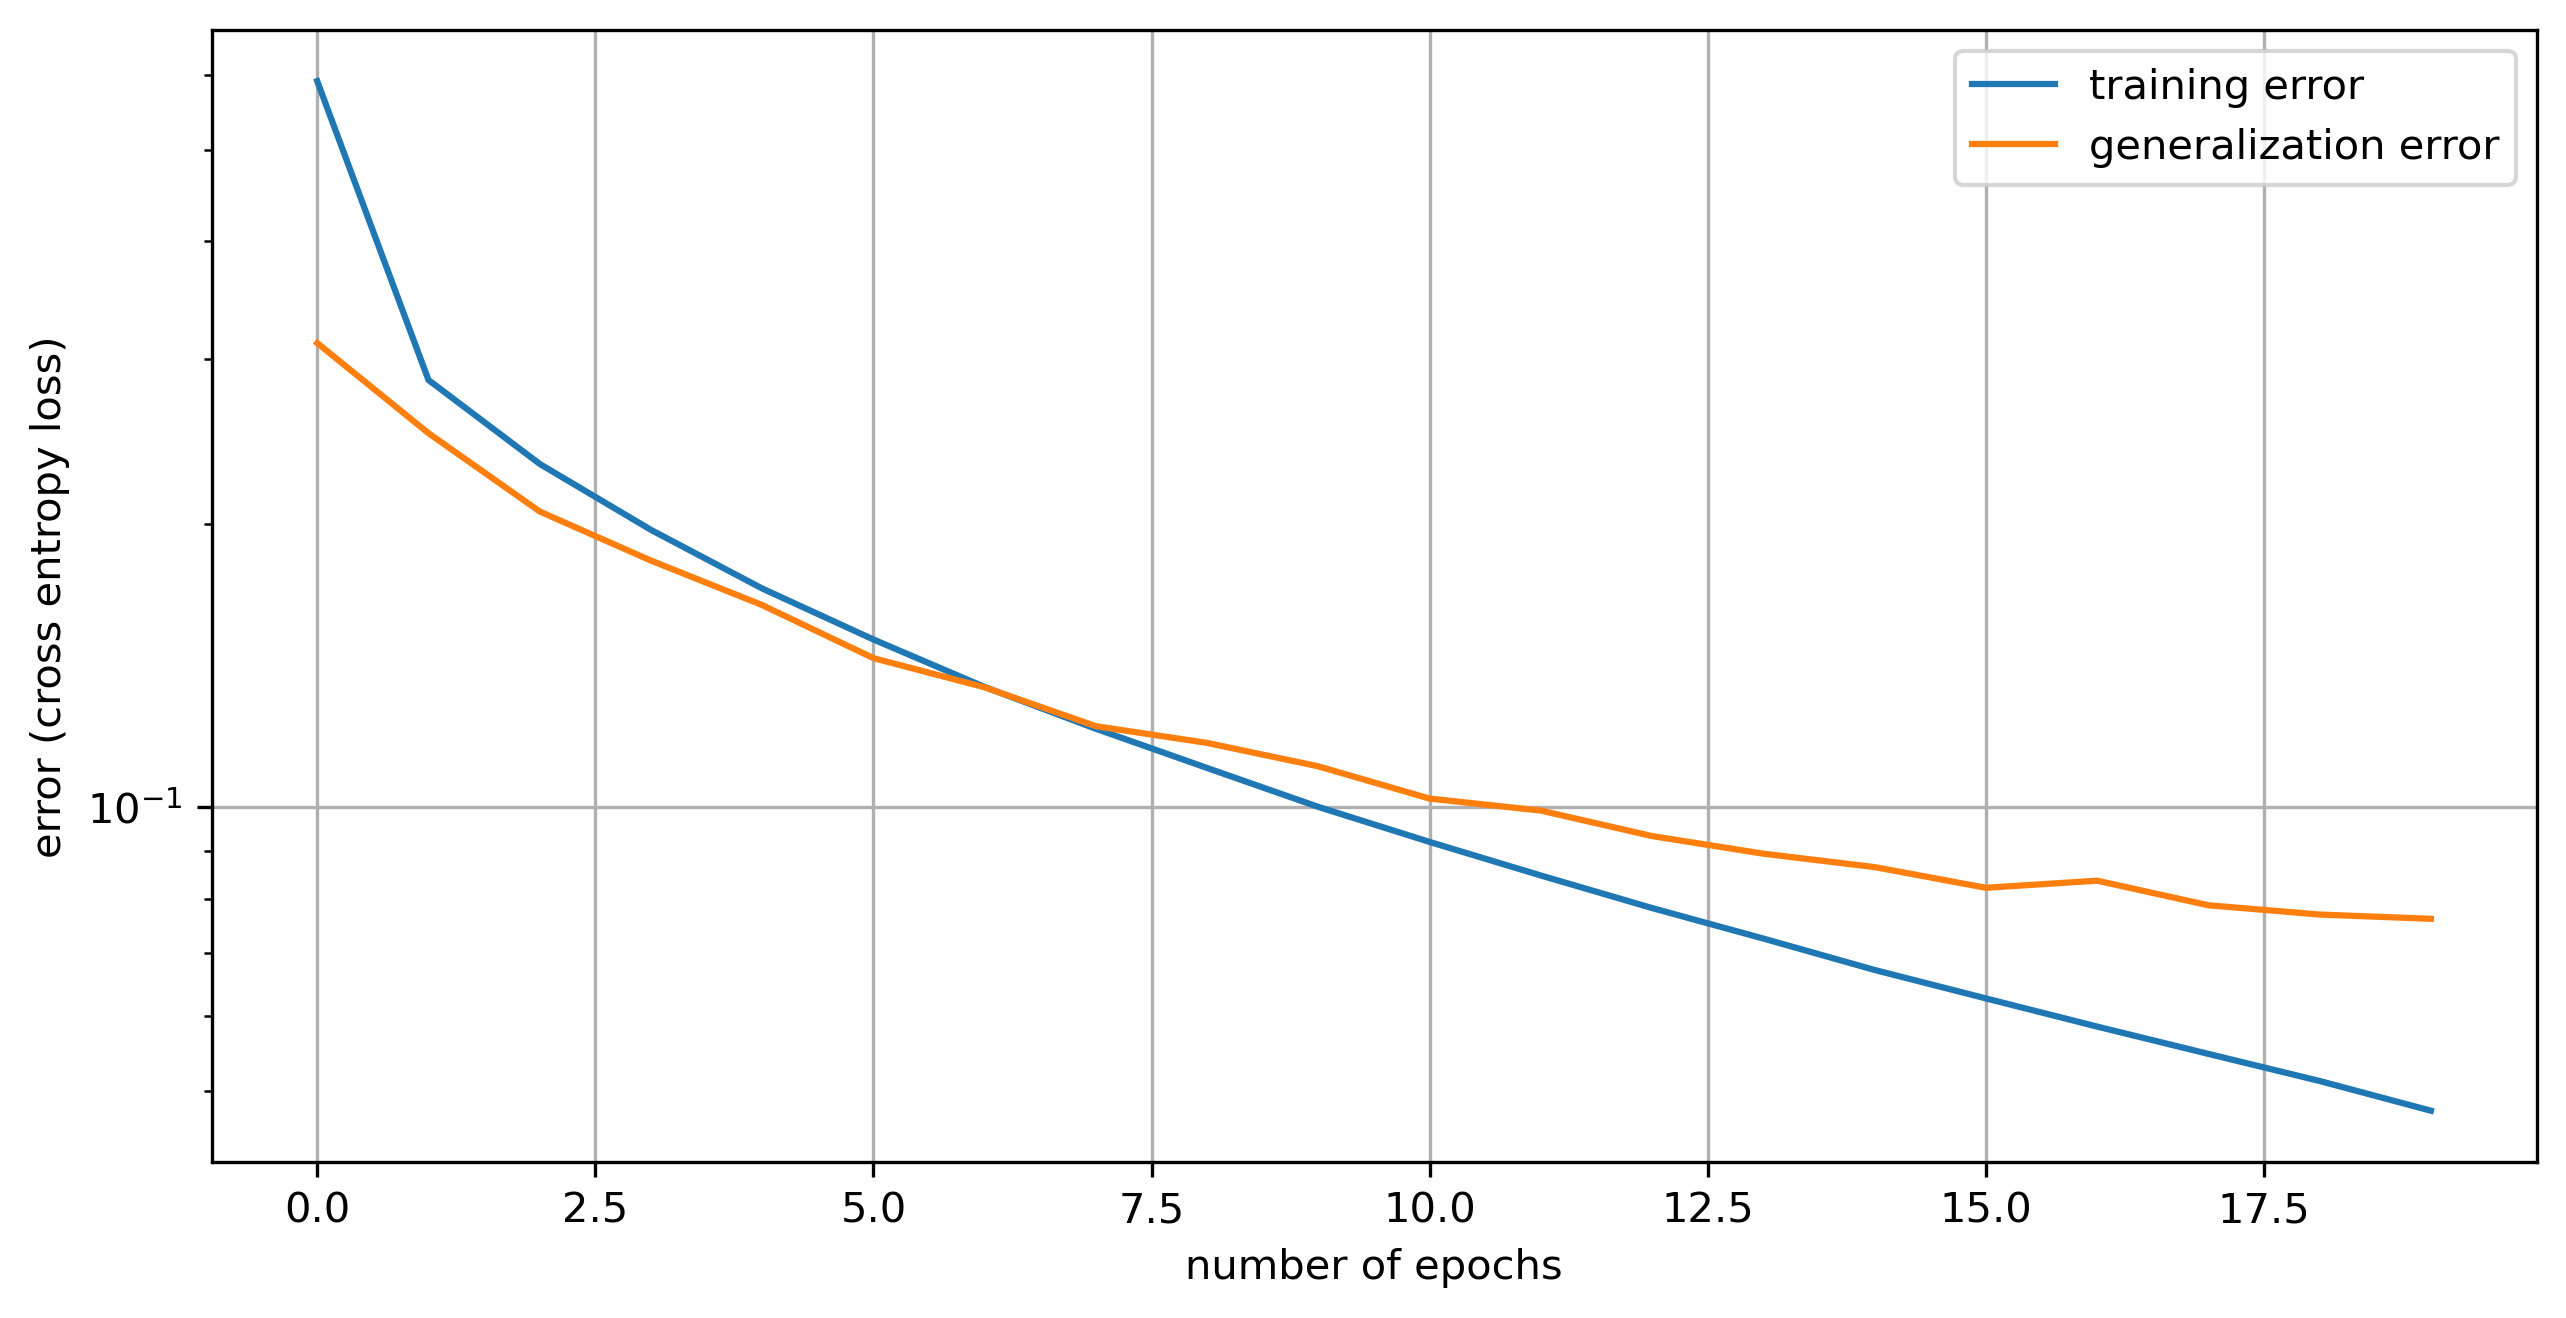

In [23]:
plt.figure(figsize=(10,5),dpi=300)
plt.semilogy(history_mlp.history["loss"],label="training error")
plt.semilogy(history_mlp.history["val_loss"],label="generalization error")
plt.ylabel("error (cross entropy loss)")
plt.xlabel("number of epochs")
plt.legend()
plt.grid(True)
plt.show()

Plot training history with respect to training / generalization accuracy (percentage of correct classifications)

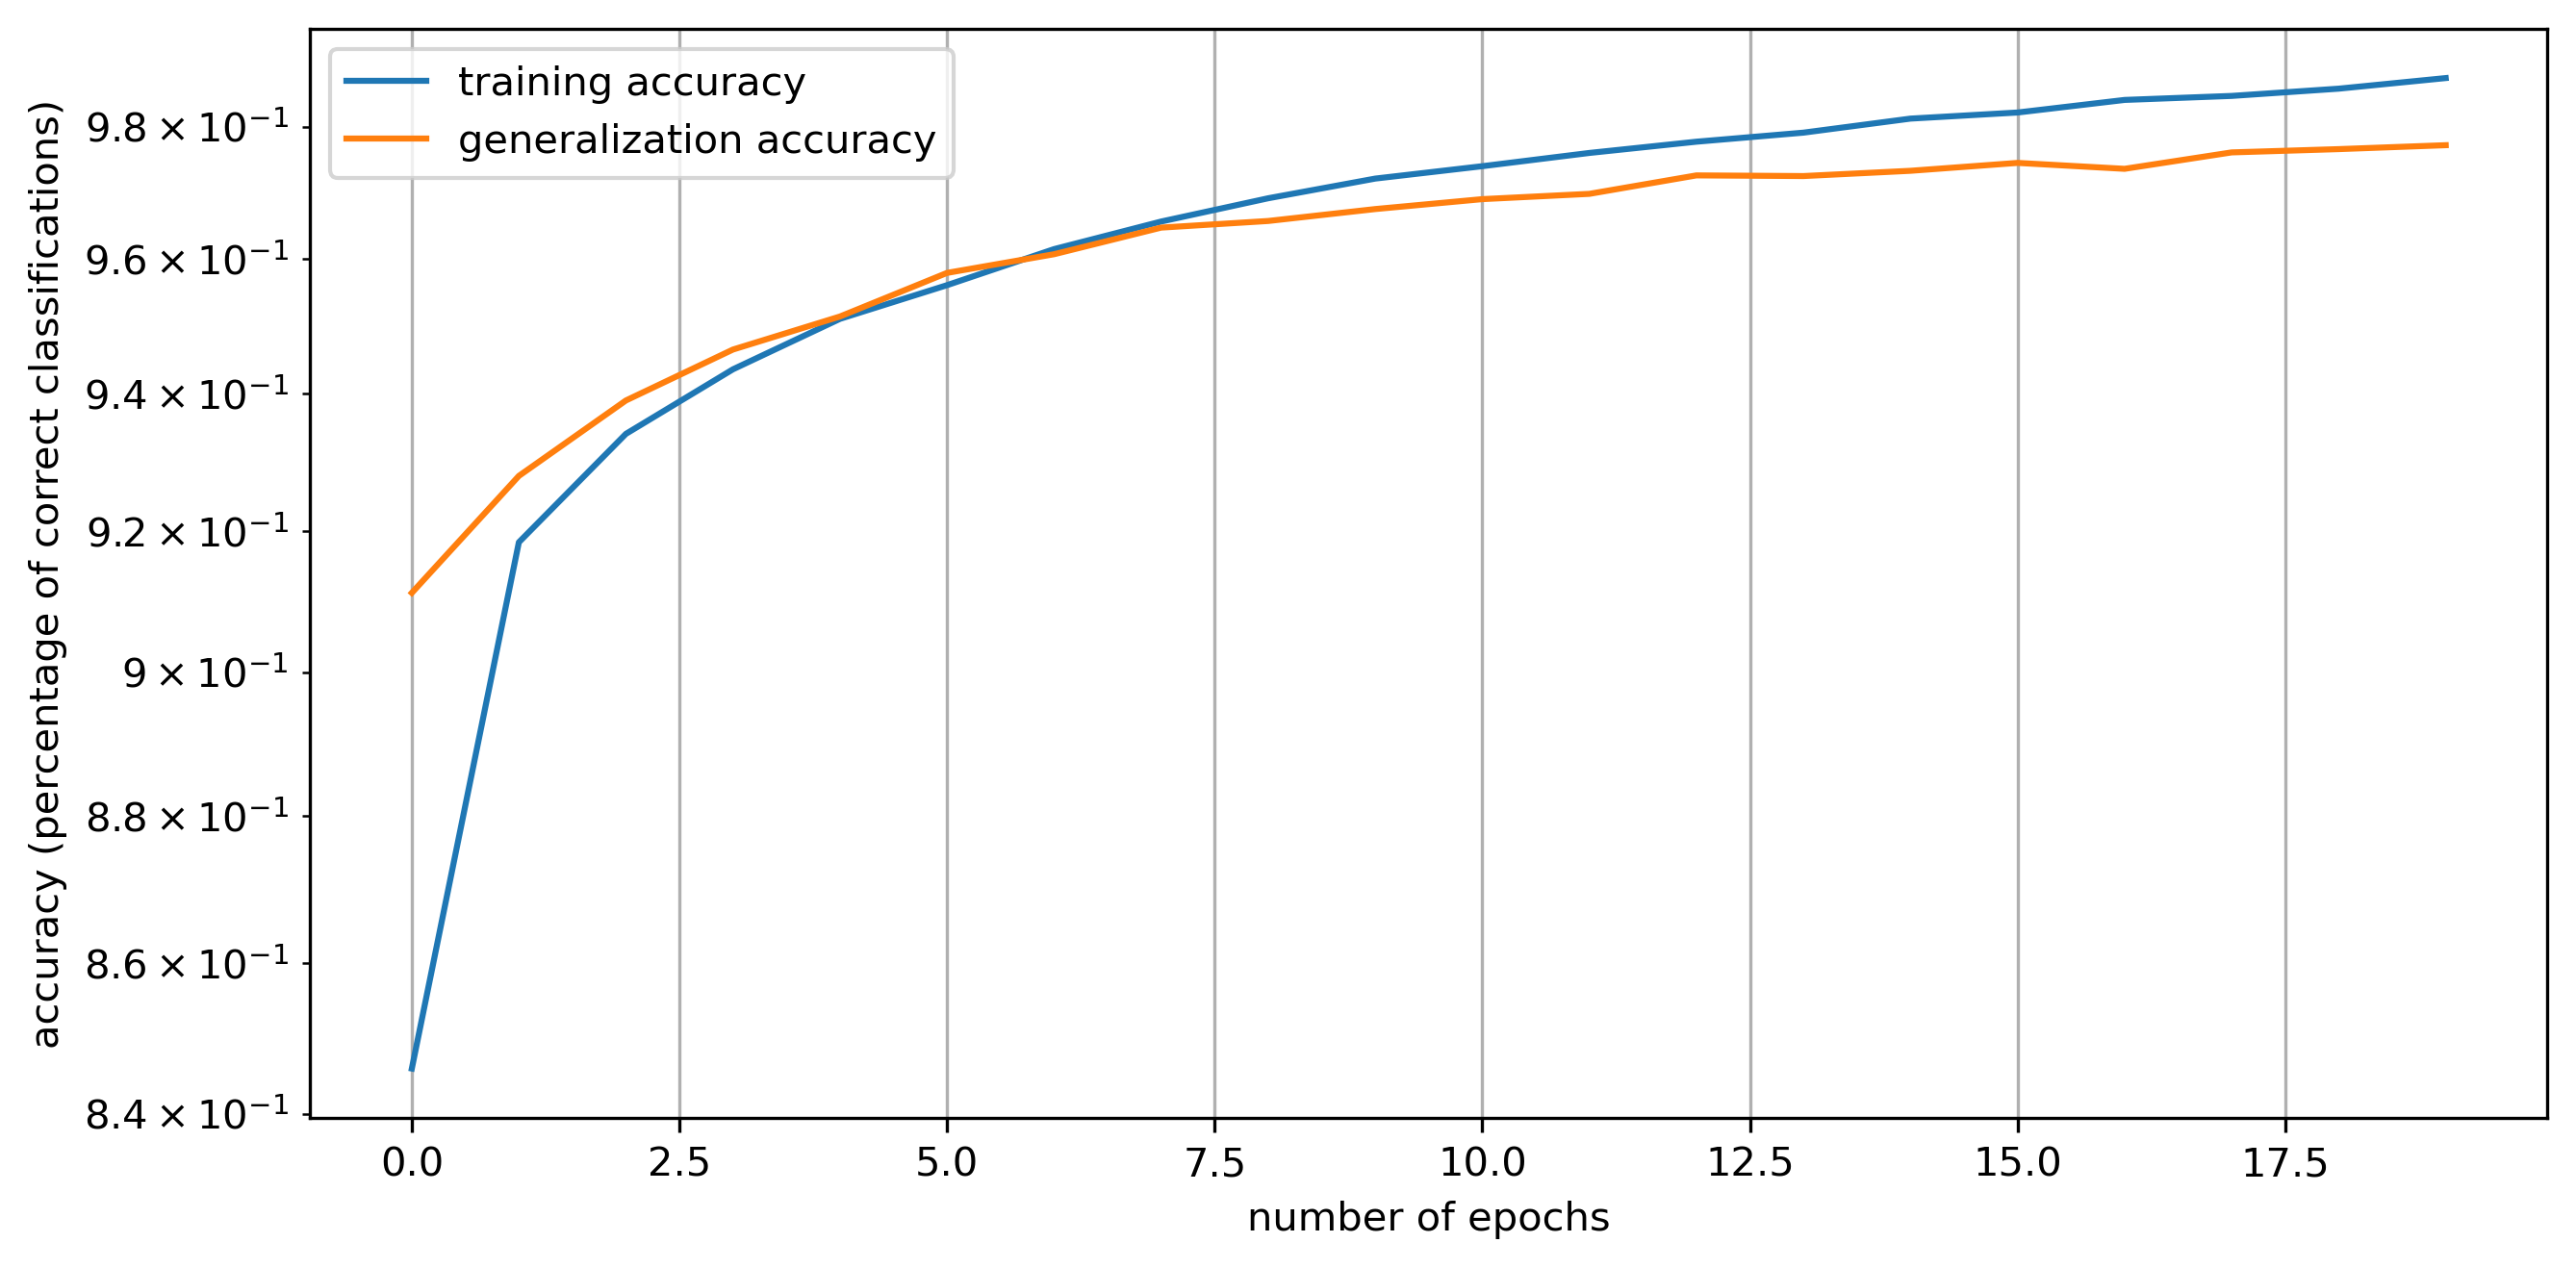

In [24]:
plt.figure(figsize=(10,5),dpi=300)
plt.semilogy(history_mlp.history["accuracy"],label="training accuracy")
plt.semilogy(history_mlp.history["val_accuracy"],label="generalization accuracy")
plt.ylabel("accuracy (percentage of correct classifications)")
plt.xlabel("number of epochs")
plt.legend()
plt.grid(True)
plt.show()

Create convolutional neural network for image classification

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

input_layer1 = layers.Input(shape=(28,28,1))
conv_layer1 = layers.Conv2D(filters=64, activation='relu', kernel_size=(7,7), padding="same")(input_layer1)
max_pooling_layer1 = layers.MaxPooling2D(pool_size=2)(conv_layer1)
conv_layer1 = layers.Conv2D(filters=128, activation='relu', kernel_size=(3,3), padding="same")(max_pooling_layer1)
conv_layer2 = layers.Conv2D(filters=128, activation='relu', kernel_size=(3,3), padding="same")(conv_layer1)
max_pooling_layer2 = keras.layers.MaxPooling2D(pool_size=2)(conv_layer2)
conv_layer3 = layers.Conv2D(filters=256, activation='relu', kernel_size=(3,3), padding="same")(max_pooling_layer2)
conv_layer4 = layers.Conv2D(filters=256, activation='relu', kernel_size=(3,3), padding="same")(conv_layer3)
max_pooling_layer3 = keras.layers.MaxPooling2D(pool_size=2)(conv_layer4)
flatten_layer1 = keras.layers.Flatten()(max_pooling_layer3)
dense_layer1 = keras.layers.Dense(128, activation='relu')(flatten_layer1)
dropout_layer1 = keras.layers.Dropout(0.5)(dense_layer1)
dense_layer2 = keras.layers.Dense(64, activation='relu')(dropout_layer1)
dropout_layer2 = keras.layers.Dropout(0.5)(dense_layer2)
output_layer1 = keras.layers.Dense(10, activation='softmax')(dropout_layer2)

model = Model(inputs=input_layer1, outputs=output_layer1)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         2951

Configure and run training

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history_cnn = model.fit(X_train, G_train, epochs=10, validation_data=(X_validation, G_validation))

Epoch 1/10
1875/1875 [==============================] - 112s 59ms/step - loss: 0.7555 - accuracy: 0.7422 - val_loss: 0.0521 - val_accuracy: 0.9856
Epoch 2/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0990 - accuracy: 0.9769 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0731 - accuracy: 0.9829 - val_loss: 0.0302 - val_accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0659 - accuracy: 0.9851 - val_loss: 0.0322 - val_accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0534 - accuracy: 0.9876 - val_loss: 0.0471 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0470 - accuracy: 0.9893 - val_loss: 0.0366 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0417 - accuracy: 0.9908 - val_loss: 0.

Plot training history with respect to training / generalization error (cross entropy loss)

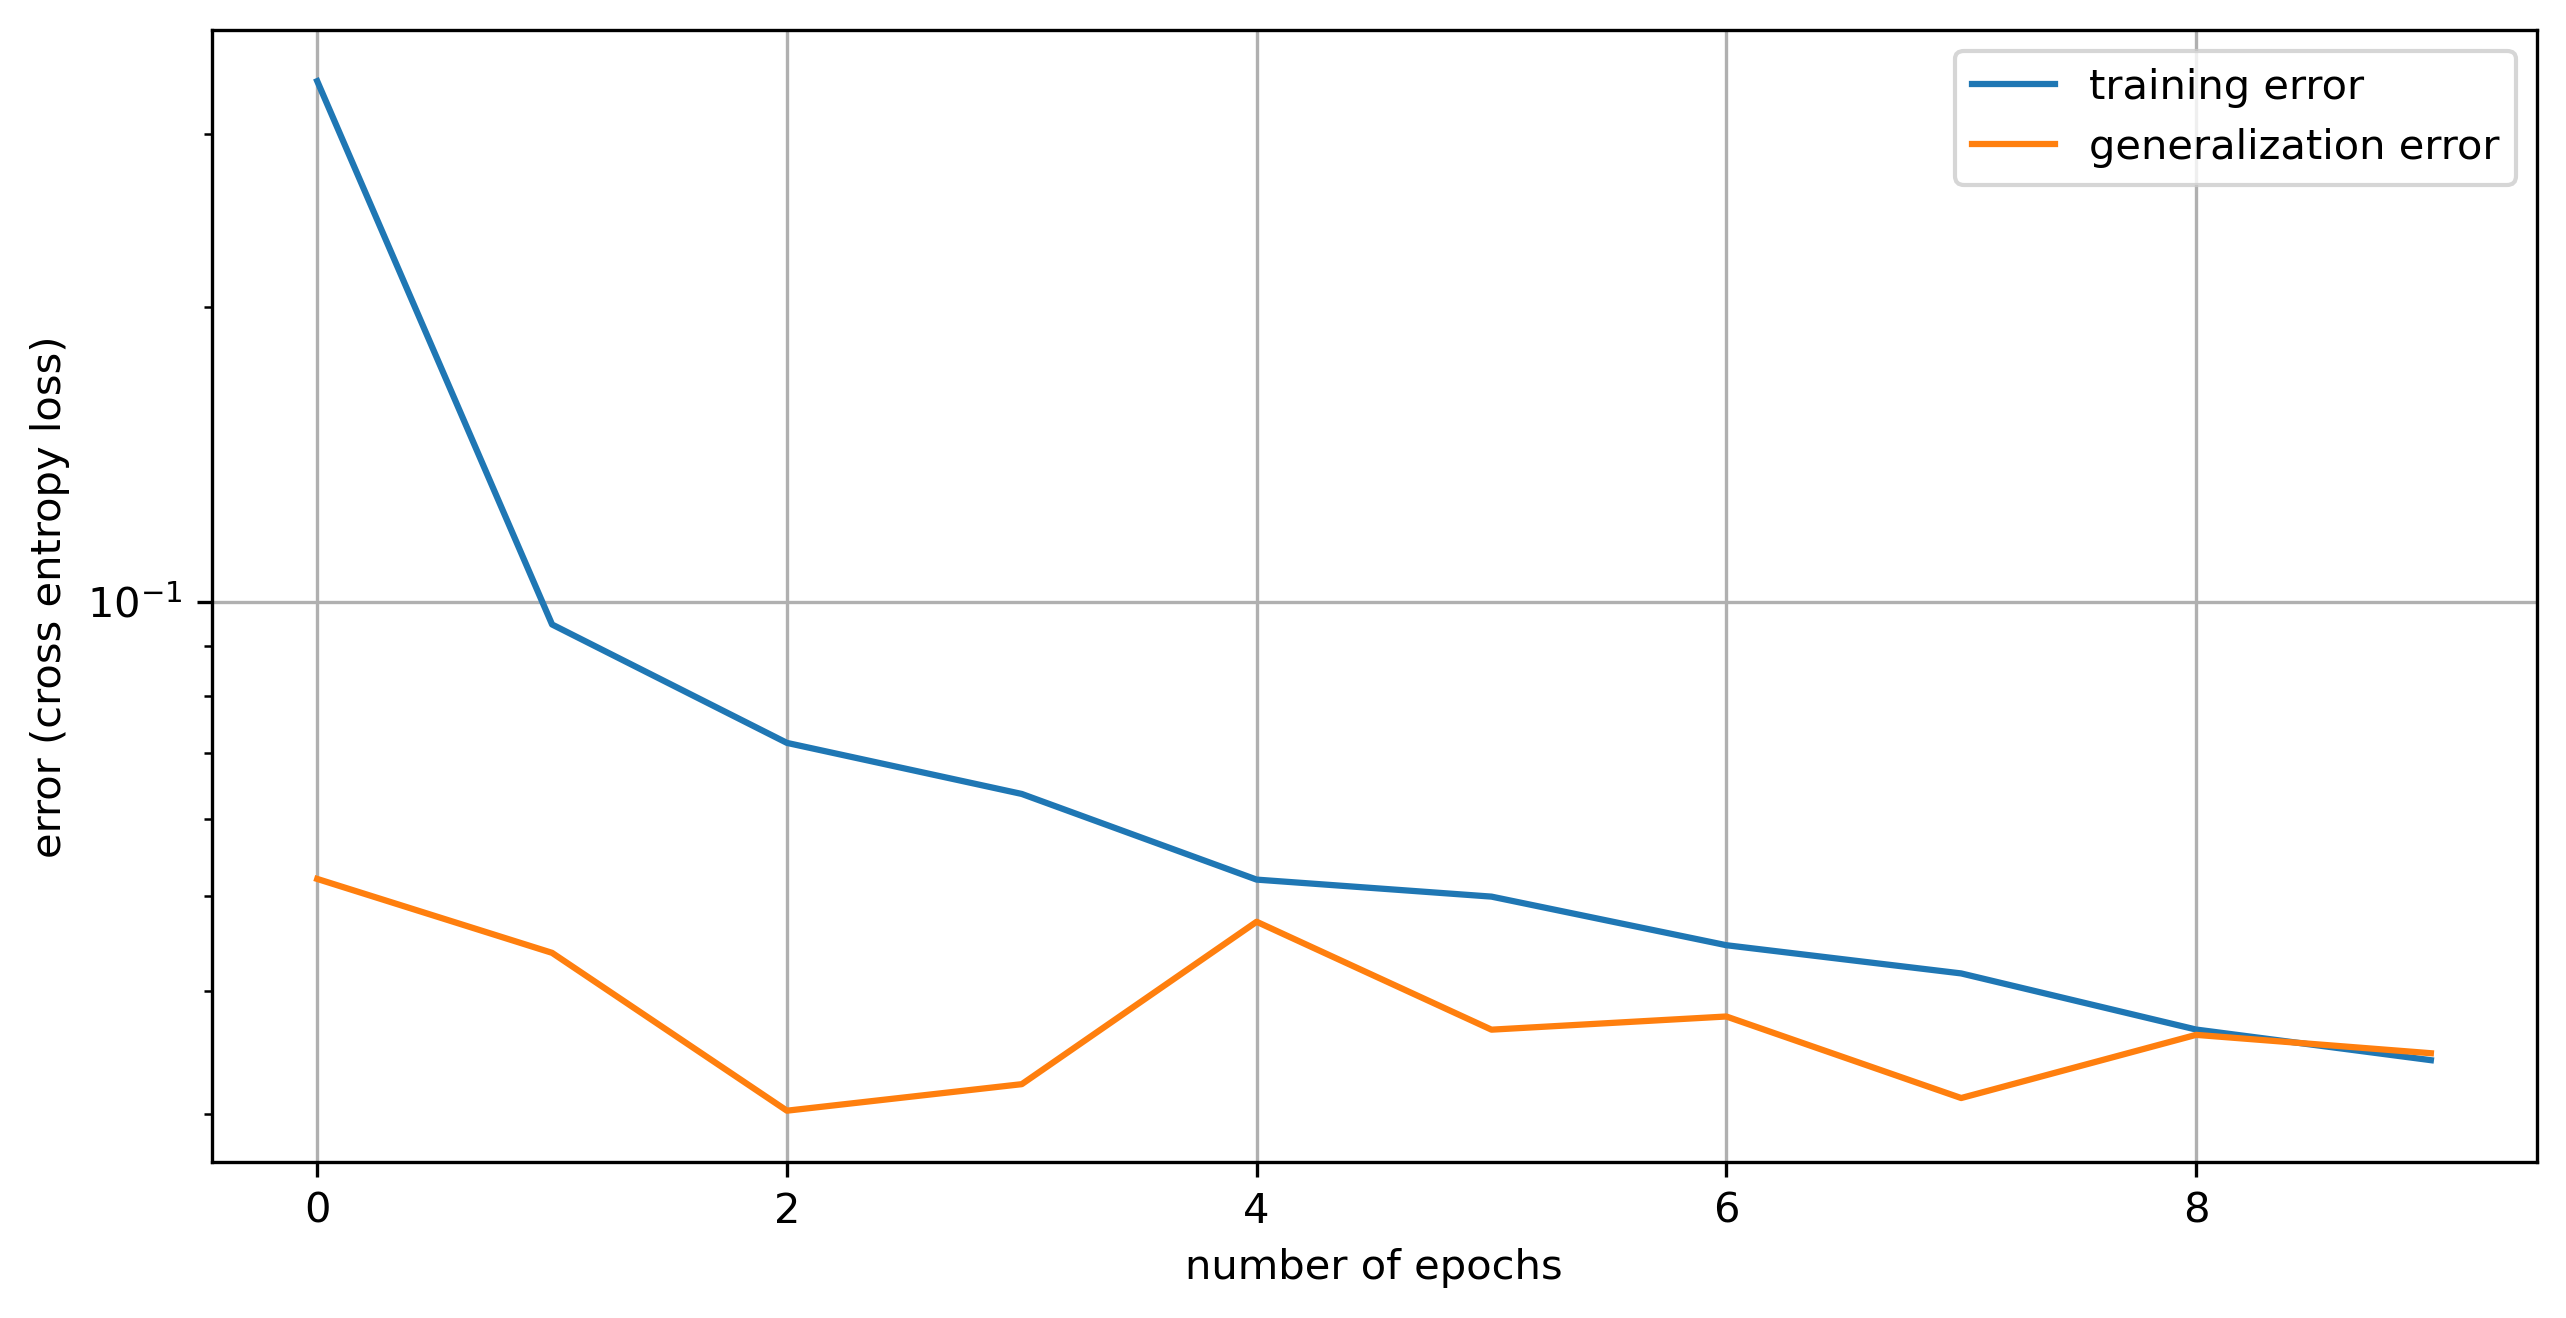

In [26]:
plt.figure(figsize=(10,5),dpi=300)
plt.semilogy(history_cnn.history["loss"],label="training error")
plt.semilogy(history_cnn.history["val_loss"],label="generalization error")
plt.ylabel("error (cross entropy loss)")
plt.xlabel("number of epochs")
plt.legend()
plt.grid(True)
plt.show()

Plot training history with respect to training / generalization accuracy (percentage of correct classifications)

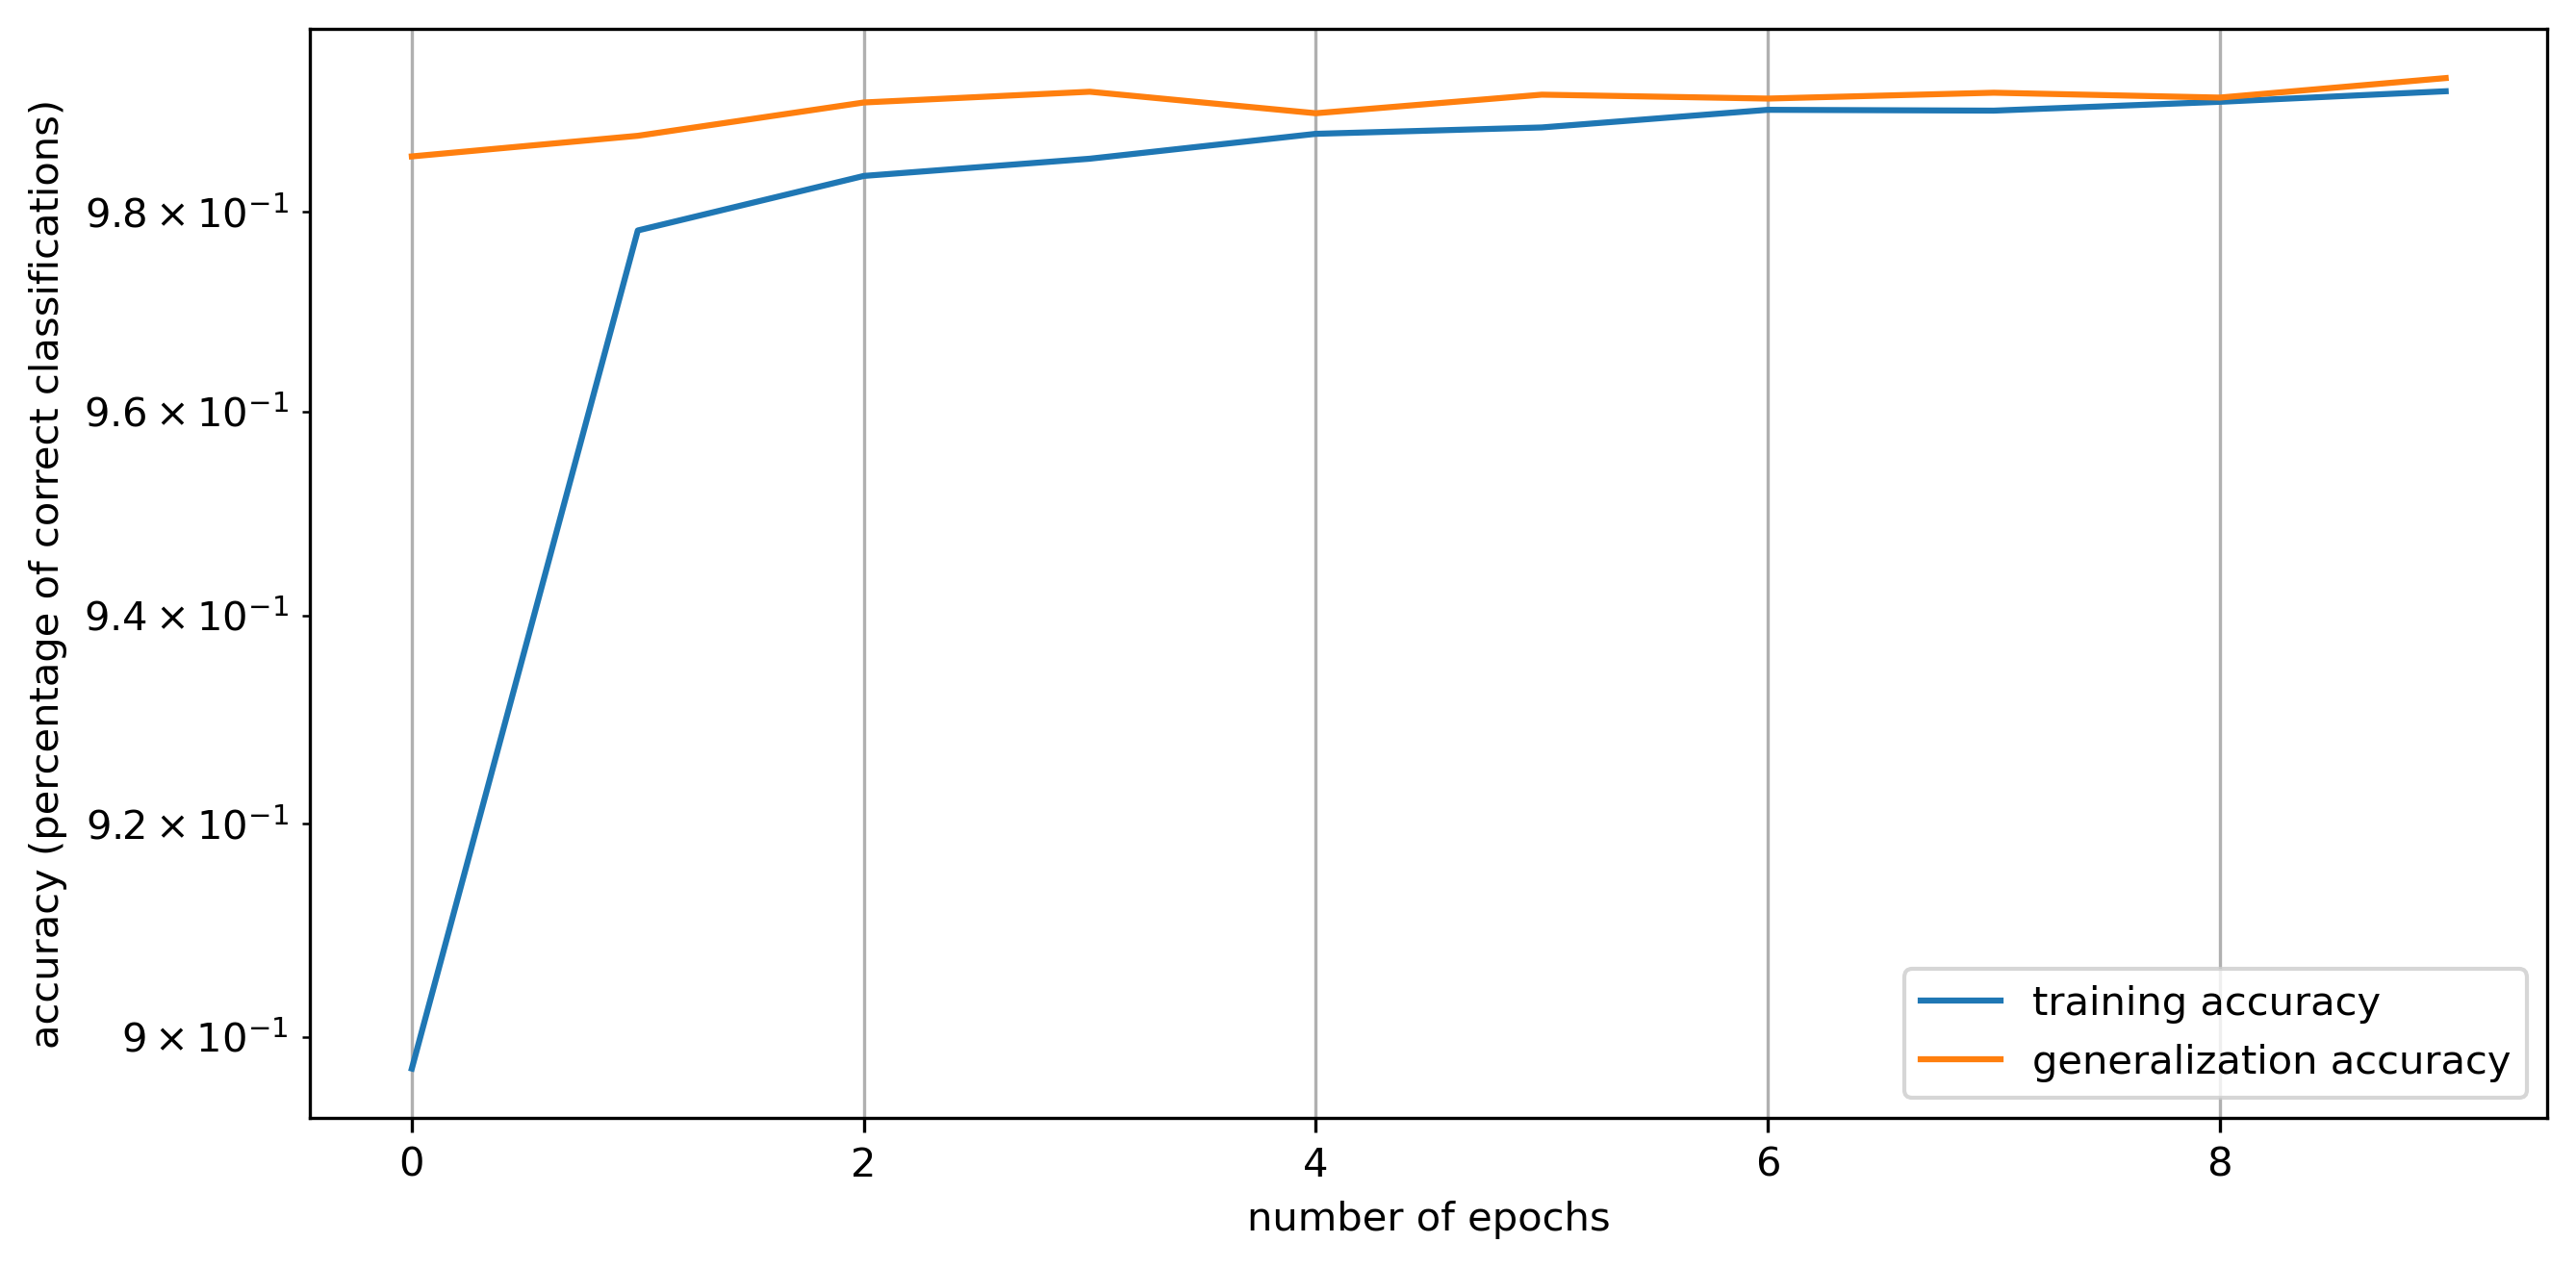

In [27]:
plt.figure(figsize=(10,5),dpi=300)
plt.semilogy(history_cnn.history["accuracy"],label="training accuracy")
plt.semilogy(history_cnn.history["val_accuracy"],label="generalization accuracy")
plt.ylabel("accuracy (percentage of correct classifications)")
plt.xlabel("number of epochs")
plt.legend()
plt.grid(True)
plt.show()

Do prediction and compare result

In [40]:
X_new = X_validation[:10] 
G_prediction = model.predict(X_new)
print("Predicted labels:")
print(np.argmax(G_prediction,axis=1))
print("Actual labels:")
print(G_validation[:10])

Predicted labels:
[7 2 1 0 4 1 4 9 5 9]
Actual labels:
[7 2 1 0 4 1 4 9 5 9]
